# Case Study - Country Club - Tier 2 [Rayees Ahamed]

Welcome to the SQL mini project. You will carry out this project partly in
the PHPMyAdmin interface, and partly in Jupyter via a Python connection.

The data you need is in the "country_club" database. This database
contains 3 tables:
    i) the "Bookings" table,
    ii) the "Facilities" table, and
    iii) the "Members" table.
    
**Comments:**

Q1 to Q9 solved with PHPMyAdmin interface, Q10 to Q13 solved with Jupyter notebook, but for better representation all the answers for all questions were pasted here.

**Import packages**

In [260]:
from sqlalchemy import create_engine, func
import pandas as pd
from datetime import date

**Creating SQL engine**

In [261]:
engine = create_engine("sqlite:///sqlite_db_pythonsqlite.db")


**Querying the tables**

In [262]:
# Bookings table

bookings = pd.read_sql("SELECT * FROM Bookings", engine)
bookings.head()

,bookid,facid,memid,starttime,slots
0,0,3,1,2012-07-03 11:00:00,2
1,1,4,1,2012-07-03 08:00:00,2
2,2,6,0,2012-07-03 18:00:00,2
3,3,7,1,2012-07-03 19:00:00,2
4,4,8,1,2012-07-03 10:00:00,1


In [263]:
# Facilities table

facilities = pd.read_sql("SELECT * FROM Facilities", engine)
facilities.head()

,facid,name,membercost,guestcost,initialoutlay,monthlymaintenance
0,0,Tennis Court 1,5.0,25.0,10000,200
1,1,Tennis Court 2,5.0,25.0,8000,200
2,2,Badminton Court,0.0,15.5,4000,50
3,3,Table Tennis,0.0,5.0,320,10
4,4,Massage Room 1,9.9,80.0,4000,3000


In [264]:
# Members table

members = pd.read_sql("SELECT * FROM Members", engine)
members.head()

,memid,surname,firstname,address,zipcode,telephone,recommendedby,joindate
0,0,GUEST,GUEST,GUEST,0,(000) 000-0000,,2012-07-01 00:00:00
1,1,Smith,Darren,"8 Bloomsbury Close, Boston",4321,555-555-5555,,2012-07-02 12:02:05
2,2,Smith,Tracy,"8 Bloomsbury Close, New York",4321,555-555-5555,,2012-07-02 12:08:23
3,3,Rownam,Tim,"23 Highway Way, Boston",23423,(844) 693-0723,,2012-07-03 09:32:15
4,4,Joplette,Janice,"20 Crossing Road, New York",234,(833) 942-4710,1,2012-07-03 10:25:05


**PART 1: Solved with PHPMyAdmin**

**Question 1:**

Some of the facilities charge a fee to members, but some do not.
Write a SQL query to produce a list of the names of the facilities that do.

In [265]:
# Answer:

q1 = """
SELECT *
FROM `Facilities`
WHERE membercost != 0.0
"""

a1 = pd.read_sql(q1, engine)
a1

,facid,name,membercost,guestcost,initialoutlay,monthlymaintenance
0,0,Tennis Court 1,5.0,25.0,10000,200
1,1,Tennis Court 2,5.0,25.0,8000,200
2,4,Massage Room 1,9.9,80.0,4000,3000
3,5,Massage Room 2,9.9,80.0,4000,3000
4,6,Squash Court,3.5,17.5,5000,80


**Question 2:**

How many facilities do not charge a fee to members?

In [266]:
# Answer:

q2 = """
SELECT *
FROM `Facilities`
WHERE membercost = 0.0
"""

a2 = pd.read_sql(q2, engine)
a2

,facid,name,membercost,guestcost,initialoutlay,monthlymaintenance
0,2,Badminton Court,0,15.5,4000,50
1,3,Table Tennis,0,5.0,320,10
2,7,Snooker Table,0,5.0,450,15
3,8,Pool Table,0,5.0,400,15


**Question 3:**

Write an SQL query to show a list of facilities that charge a fee to members,
where the fee is less than 20% of the facility's monthly maintenance cost.
Return the facid, facility name, member cost, and monthly maintenance of the
facilities in question.

In [267]:
# Answer:

q3 = """
SELECT facid, name, membercost, monthlymaintenance
FROM `Facilities`
WHERE membercost != 0.0
AND membercost < ( monthlymaintenance/100 *20 )
"""

a3 = pd.read_sql(q3, engine)
a3

,facid,name,membercost,monthlymaintenance
0,0,Tennis Court 1,5.0,200
1,1,Tennis Court 2,5.0,200
2,4,Massage Room 1,9.9,3000
3,5,Massage Room 2,9.9,3000


**Question 4:**

Write an SQL query to retrieve the details of facilities with ID 1 and 5.
Try writing the query without using the OR operator.

In [268]:
# Answer:

q4 = """
SELECT *
FROM Facilities
WHERE facid
IN ( 1, 5 )
"""

a4 = pd.read_sql(q4, engine)
a4

,facid,name,membercost,guestcost,initialoutlay,monthlymaintenance
0,1,Tennis Court 2,5.0,25,8000,200
1,5,Massage Room 2,9.9,80,4000,3000


**Question 5:**

Produce a list of facilities, with each labelled as
'cheap' or 'expensive', depending on if their monthly maintenance cost is
more than $100. Return the name and monthly maintenance of the facilities
in question.

In [269]:
# Answer

q5 = """
SELECT name, monthlymaintenance,
CASE WHEN monthlymaintenance >100
THEN 'expensive'
WHEN monthlymaintenance <100
THEN 'cheap'
ELSE 'null'
END AS 'price_group'
FROM Facilities
"""

a5 = pd.read_sql(q5, engine)
a5

,name,monthlymaintenance,price_group
0,Tennis Court 1,200,expensive
1,Tennis Court 2,200,expensive
2,Badminton Court,50,cheap
3,Table Tennis,10,cheap
4,Massage Room 1,3000,expensive
5,Massage Room 2,3000,expensive
6,Squash Court,80,cheap
7,Snooker Table,15,cheap
8,Pool Table,15,cheap


**Question 6:**

You'd like to get the first and last name of the last member(s)
who signed up. Try not to use the LIMIT clause for your solution.

In [270]:
# Answer:

q6 = """
SELECT firstname, surname, joindate
FROM `Members`
ORDER BY joindate DESC
"""

a6 = pd.read_sql(q6, engine)
a6

,firstname,surname,joindate
0,Darren,Smith,2012-09-26 18:08:45
1,Erica,Crumpet,2012-09-22 08:36:38
2,John,Hunt,2012-09-19 11:32:45
3,Hyacinth,Tupperware,2012-09-18 19:32:05
4,Millicent,Purview,2012-09-18 19:04:01
5,Henry,Worthington-Smyth,2012-09-17 12:27:15
6,David,Farrell,2012-09-15 08:22:05
7,Henrietta,Rumney,2012-09-05 08:42:35
8,Douglas,Jones,2012-09-02 18:43:05
9,Ramnaresh,Sarwin,2012-09-01 08:44:42


**Question 7:**

Produce a list of all members who have used a tennis court.
Include in your output the name of the court, and the name of the member
formatted as a single column. Ensure no duplicate data, and order by
the member name.

In [271]:
# Answer:

q7 = """
SELECT f.name, m.firstname || " " || m.surname AS full_name
FROM Bookings AS b
LEFT JOIN Facilities AS f ON b.facid = f.facid
LEFT JOIN Members AS m ON m.memid = b.memid
WHERE f.name LIKE '%Tennis Court%'
GROUP BY full_name
ORDER BY full_name
"""

a7 = pd.read_sql(q7, engine)
a7

,name,full_name
0,Tennis Court 1,Anne Baker
1,Tennis Court 2,Burton Tracy
2,Tennis Court 1,Charles Owen
3,Tennis Court 2,Darren Smith
4,Tennis Court 1,David Farrell
5,Tennis Court 2,David Jones
6,Tennis Court 1,David Pinker
7,Tennis Court 1,Douglas Jones
8,Tennis Court 1,Erica Crumpet
9,Tennis Court 2,Florence Bader


**Question 8:**

Produce a list of bookings on the day of 2012-09-14 which
will cost the member (or guest) more than $30. Remember that guests have
different costs to members (the listed costs are per half-hour 'slot'), and
the guest user's ID is always 0. Include in your output the name of the
facility, the name of the member formatted as a single column, and the cost.
Order by descending cost, and do not use any subqueries.

In [272]:
# Answer

q8 = """
SELECT bookid, f.name, m.firstname || " " || m.surname AS full_name, 
	CASE WHEN b.memid = 0 THEN slots * guestcost
	WHEN b.memid != 0 THEN slots * membercost
	END AS tot_cost
FROM Bookings AS b
LEFT JOIN Facilities AS f
ON b.facid = f.facid
LEFT JOIN Members AS m
ON b.memid = m.memid
WHERE starttime LIKE "%2012-09-14%"
ORDER BY tot_cost DESC
"""

a8 = pd.read_sql(q8, engine)
a8.head(12)

,bookid,name,full_name,tot_cost
0,2946,Massage Room 2,GUEST GUEST,320.0
1,2937,Massage Room 1,GUEST GUEST,160.0
2,2940,Massage Room 1,GUEST GUEST,160.0
3,2942,Massage Room 1,GUEST GUEST,160.0
4,2926,Tennis Court 2,GUEST GUEST,150.0
5,2920,Tennis Court 1,GUEST GUEST,75.0
6,2922,Tennis Court 1,GUEST GUEST,75.0
7,2925,Tennis Court 2,GUEST GUEST,75.0
8,2948,Squash Court,GUEST GUEST,70.0
9,2941,Massage Room 1,Jemima Farrell,39.6


**Question 9:**

This time, produce the same result as in Q8, but using a subquery.

In [273]:
# Answer (with subquery)

q9 = """
SELECT bookid, name, firstname || " " || surname AS full_name, tot_cost
FROM 
	(SELECT bookid, f.facid, f.name, b.memid, m.firstname, m.surname, f.membercost, f.guestcost, slots, 
		CASE WHEN b.memid = 0 THEN slots * guestcost
		WHEN b.memid != 0 THEN slots * membercost
		END AS tot_cost
	FROM Bookings AS b
	LEFT JOIN Facilities AS f
	ON b.facid = f.facid
	LEFT JOIN Members AS m
	ON b.memid = m.memid
	WHERE starttime LIKE "%2012-09-14%") AS subquery
WHERE tot_cost > 30
ORDER BY tot_cost DESC
"""

a9 = pd.read_sql(q9, engine)
a9

,bookid,name,full_name,tot_cost
0,2946,Massage Room 2,GUEST GUEST,320.0
1,2937,Massage Room 1,GUEST GUEST,160.0
2,2940,Massage Room 1,GUEST GUEST,160.0
3,2942,Massage Room 1,GUEST GUEST,160.0
4,2926,Tennis Court 2,GUEST GUEST,150.0
5,2920,Tennis Court 1,GUEST GUEST,75.0
6,2922,Tennis Court 1,GUEST GUEST,75.0
7,2925,Tennis Court 2,GUEST GUEST,75.0
8,2948,Squash Court,GUEST GUEST,70.0
9,2941,Massage Room 1,Jemima Farrell,39.6


**PART 2: Solved with SQLite instance from Jupyter Notebook**

**Question 10:**

Produce a list of facilities with a total revenue less than 1000.
The output of facility name and total revenue, sorted by revenue. Remember
that there's a different cost for guests and members!

In [274]:
# Answer

q10 = """
SELECT name, member_rev, guest_rev
FROM
(SELECT bookid, b.facid, slots, name, membercost, guestcost,
		SUM(CASE WHEN b.memid = 0 THEN slots * guestcost
		END) AS member_rev,
		SUM(CASE WHEN b.memid != 0 THEN slots * membercost
		END) AS guest_rev
	FROM Bookings AS b
	LEFT JOIN Facilities AS f
	ON b.facid = f.facid
	LEFT JOIN Members AS m
	ON b.memid = m.memid
GROUP BY f.facid) AS subquery
WHERE member_rev < 1000 AND guest_rev < 1000
"""

a10 = pd.read_sql(q10, engine)
a10

,name,member_rev,guest_rev
0,Table Tennis,180,0
1,Snooker Table,240,0
2,Pool Table,270,0


**Question 11:**

Produce a report of members and who recommended them in alphabetic surname,firstname order

In [275]:
# Answer:

q11 = """
SELECT m1.memid, m1.surname, m1.firstname, m1.recommendedby, m2.surname, m2.firstname
FROM Members AS m1
LEFT JOIN Members AS m2
ON m1.recommendedby = m2.memid;
"""

a11 = pd.read_sql(q11, engine)
a11

,memid,surname,firstname,recommendedby,surname,firstname
0,0,GUEST,GUEST,,None,None
1,1,Smith,Darren,,None,None
2,2,Smith,Tracy,,None,None
3,3,Rownam,Tim,,None,None
4,4,Joplette,Janice,1,Smith,Darren
5,5,Butters,Gerald,1,Smith,Darren
6,6,Tracy,Burton,,None,None
7,7,Dare,Nancy,4,Joplette,Janice
8,8,Boothe,Tim,3,Rownam,Tim
9,9,Stibbons,Ponder,6,Tracy,Burton


**Question 12:**

Find the facilities with their usage by member, but not guests

In [276]:
# Answer: Usage by hours calculated

q12 = """
SELECT b.facid, f.name, b.memid, m.surname, m.firstname, SUM(slots) * 0.5 AS Hours_used
FROM Bookings AS b
LEFT JOIN Facilities AS f
ON b.facid = f.facid
LEFT JOIN Members AS m
ON b.memid = m.memid
WHERE b.memid != 0
GROUP BY b.memid, f.facid
ORDER BY b.memid
"""

a12 = pd.read_sql(q12, engine)
a12

,facid,name,memid,surname,firstname,Hours_used
0,1,Tennis Court 2,1,Smith,Darren,28.5
1,2,Badminton Court,1,Smith,Darren,216.0
2,3,Table Tennis,1,Smith,Darren,28.0
3,4,Massage Room 1,1,Smith,Darren,29.0
4,6,Squash Court,1,Smith,Darren,15.0
...,...,...,...,...,...,...
197,6,Squash Court,35,Hunt,John,1.0
198,0,Tennis Court 1,36,Crumpet,Erica,1.5
199,2,Badminton Court,36,Crumpet,Erica,3.0
200,3,Table Tennis,36,Crumpet,Erica,2.0


**Question 13:**

Find the facilities usage by month, but not guests

In [281]:
# Answer: Usage by hours calculated

q13 = """
SELECT EXTRACT(MONTH FROM b.starttime) AS months, b.facid, f.name, SUM(slots) * 0.5 AS Hours_used
FROM Bookings AS b
LEFT JOIN Facilities AS f
ON b.facid = f.facid
LEFT JOIN Members AS m
ON b.memid = m.memid
WHERE b.memid != 0
GROUP BY  months, f.facid
ORDER BY months
"""

a13 = pd.read_sql(q13, engine)
a13

OperationalError: (sqlite3.OperationalError) near "FROM": syntax error
[SQL: 
SELECT b.starttime, b.facid, f.name, SUM(slots) * 0.5 AS Hours_used
FROM Bookings AS b
LEFT JOIN Facilities AS f
ON b.facid = f.facid
LEFT JOIN Members AS m
ON b.memid = m.memid
WHERE b.memid != 0
GROUP BY EXTRACT(MONTH FROM b.starttime) AS months, f.facid
ORDER BY EXTRACT(MONTH FROM b.starttime) AS months
]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

**Comments:**

Question 13 answer code runs successfully with PHPMyAdmin, but not working with Jupyter notebook, it generates error when I use EXTRACT function to separate month from datetime column. So, the answer not listed here. (attached the screenshot from PHP page)

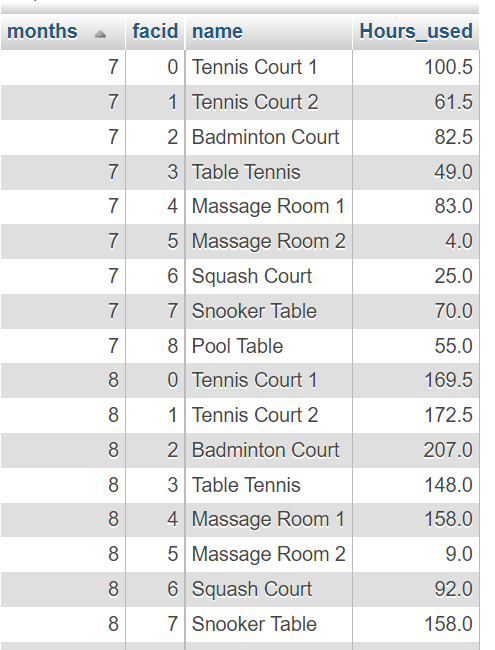